In [1]:
import pandas as pd
import numpy as np

In [2]:
rentsmart_all = pd.read_csv('data/rentsmart_20211130.csv', 
                            parse_dates=True, \
                            dtype={'zip_code': str })
rentsmart_all.head()

,date,violotaion_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"117 Fulton St #5, 02109",Boston,02109,303580000,ONE-17 FULTON ST CONDO TR,1899.0,2002.0,Condominium Main*,42.362490,-71.052820
1,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"59 Myrtle St, 02114",Boston,02114,501923000,DECKER CATHERINE TRST,1899.0,2009.0,Residential 7 or more units,42.359396,-71.066566
2,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"70-72 Joy St, 02114",Boston,02114,300153000,PIZZUTI DONATO F,1899.0,2016.0,Residential 7 or more units,42.360630,-71.065330
3,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"49 Brimmer St, 02108",Boston,02108,502528000,DUMBAUGH CHARLES C TS,1899.0,2016.0,Residential 7 or more units,42.357020,-71.071950
4,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"19 Tileston St, 02113",Boston,02113,302085000,NINETEEN TILESTON ST CONDO T,1999.0,1999.0,Condominium Main*,42.365540,-71.053720


In [3]:
rentsmart_all.rename(columns={'violotaion_type': 'violation_type'}, inplace=True)
rentsmart_all.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"117 Fulton St #5, 02109",Boston,02109,303580000,ONE-17 FULTON ST CONDO TR,1899.0,2002.0,Condominium Main*,42.362490,-71.052820
1,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"59 Myrtle St, 02114",Boston,02114,501923000,DECKER CATHERINE TRST,1899.0,2009.0,Residential 7 or more units,42.359396,-71.066566
2,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"70-72 Joy St, 02114",Boston,02114,300153000,PIZZUTI DONATO F,1899.0,2016.0,Residential 7 or more units,42.360630,-71.065330
3,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"49 Brimmer St, 02108",Boston,02108,502528000,DUMBAUGH CHARLES C TS,1899.0,2016.0,Residential 7 or more units,42.357020,-71.071950
4,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"19 Tileston St, 02113",Boston,02113,302085000,NINETEEN TILESTON ST CONDO T,1999.0,1999.0,Condominium Main*,42.365540,-71.053720


In [4]:
# check if there are any missing addresses
rentsmart_all[rentsmart_all['address'].isna()]

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude


In [5]:
rentsmart_all.shape

(309307, 13)

In [6]:
rentsmart_all['date'].max(), rentsmart_all['date'].min()

('2021-11-29 00:00:00', '2016-12-26 11:47:00')

In [7]:
# get a dataframe with only data for 2011
rentsmart_2021 = rentsmart_all[rentsmart_all['date'] >= '2021-01-01']
rentsmart_2021.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"117 Fulton St #5, 02109",Boston,02109,303580000,ONE-17 FULTON ST CONDO TR,1899.0,2002.0,Condominium Main*,42.362490,-71.052820
1,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"59 Myrtle St, 02114",Boston,02114,501923000,DECKER CATHERINE TRST,1899.0,2009.0,Residential 7 or more units,42.359396,-71.066566
2,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"70-72 Joy St, 02114",Boston,02114,300153000,PIZZUTI DONATO F,1899.0,2016.0,Residential 7 or more units,42.360630,-71.065330
3,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"49 Brimmer St, 02108",Boston,02108,502528000,DUMBAUGH CHARLES C TS,1899.0,2016.0,Residential 7 or more units,42.357020,-71.071950
4,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"19 Tileston St, 02113",Boston,02113,302085000,NINETEEN TILESTON ST CONDO T,1999.0,1999.0,Condominium Main*,42.365540,-71.053720


In [8]:
rentsmart_2021.shape, rentsmart_2021['date'].min(), rentsmart_2021['date'].max()

((58910, 13), '2021-01-01 00:00:00', '2021-11-29 00:00:00')

In [9]:
rentsmart_2021.sample(n=10)

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
50692,2021-02-25 00:00:00,Enforcement Violations,Overfilling of barrel/dumpster,"37 Wales St, 02124",Dorchester,02124,1401948000,HEADING HOME INC,1990.0,NaN,Residential 7 or more units,42.296396,-71.084694
16678,2021-09-04 00:00:00,Enforcement Violations,Overgrown Weeds On Property,"106 Chester St, 02134",Allston,02134,2100607000,ONE-06 CHESTER STREET CONDO,1920.0,2006.0,Condominium Main*,42.354270,-71.128060
34116,2021-06-17 00:00:00,Enforcement Violations,Improper storage trash: res,"137-137A Salem St, 02113",Boston,02113,302373010,ONE-35 -137 SALEM STR CONDO,1899.0,2006.0,Condominium Main*,42.364940,-71.055360
48188,2021-03-16 00:00:00,Enforcement Violations,Overfilling of barrel/dumpster,"11 Leston St, 02126",Mattapan,02126,1403950000,ZHANG MICHAEL,1910.0,2002.0,Residential 3-family,42.283330,-71.090340
28909,2021-07-20 00:00:00,Enforcement Violations,Failure to Obtain Inspection,"125 Myrtle St #2, 02114",Boston,02114,501965000,MATTHEW HANEY,1899.0,1990.0,Residential 4 or more family,42.359350,-71.069160
29619,2021-07-15 11:02:00,Housing Complaints,Maintenance Complaint - Residential,"44 Cohasset St # 2, 02131",Roslindale,02131,2000067000,MCCARTHY EUGENE P,1915.0,NaN,Residential 3-family,42.284880,-71.130890
12144,2021-09-22 23:07:15,Sanitation Requests,Rodent Activity,"73 Rutland St, 02118",Roxbury,02118,900462000,SEVENTY 3 RUTLAND CONDO TR,1999.0,1999.0,Condominium Main*,42.340570,-71.076580
31900,2021-07-02 12:23:00,Housing Complaints,Short Term Rental,"10 Pompeii St, 02119",Roxbury,02119,800987000,ROSE LARRY S,1910.0,NaN,Residential 3-family,42.329710,-71.070080
29439,2021-07-16 09:17:05,Sanitation Requests,Rodent Activity,"645-645A Tremont St, 02118",Roxbury,02118,400483000,SIX 45 TREMONT STREET,1899.0,2015.0,Condominium Main*,42.342240,-71.075320
52501,2021-02-11 18:20:00,Housing Complaints,Protection of Adjoining Property,"20 Myrtle St, 02130",Jamaica Plain,02130,1901921000,SUSSKIND LAWRENCE,2008.0,2009.0,Residential 1-family,42.314250,-71.116610


In [10]:
rentsmart_2021.dtypes

date               object
violation_type     object
description        object
address            object
neighborhood       object
zip_code           object
parcel              int64
owner              object
year built        float64
year remodeled    float64
property_type      object
latitude          float64
longitude         float64
dtype: object

In [11]:
rentsmart_2021['violation_type'].value_counts()

Enforcement Violations        39150
Housing Complaints            10493
Sanitation Requests            7305
Civic Maintenance Requests     1109
Building Violations             550
Housing Violations              303
Name: violation_type, dtype: int64

In [12]:
# top 10 violation descriptions
rentsmart_2021['description'].value_counts()[:10]

Improper storage trash: res         25271
Overfilling of barrel/dumpster       4970
Abandoned Vehicles                   3333
Overgrown Weeds On Property          2800
Rodent Activity                      2564
Failure clear sidewalk - snow        1881
Unsatisfactory Living Conditions     1511
Contractors Complaint                1397
Illegal dumping < 1 cubic yd         1391
Work w/out Permit                    1197
Name: description, dtype: int64

In [13]:
rentsmart_2021_owner = rentsmart_2021[['violation_type', 'owner']].groupby('owner').count()

In [14]:
top_10_violators = rentsmart_2021_owner.sort_values(by=['violation_type'], ascending=False)[:10]
top_10_violators

,violation_type
owner,
GBM PORTFOLIO OWNER LLC,523
COPLEY CONDOMINIUM TRUST,101
CS-3553 WASHINGTON ST LLC MASS LLC,98
500 BLUE HILL AVENUE,95
CESCO LLC MASS LLC,84
ROIFF PAUL G TS,80
SCHROER CYNTHIA L,79
TS LAND TRUST LLC,76
LACONCHA LIMITED PARTNERSHIP,74


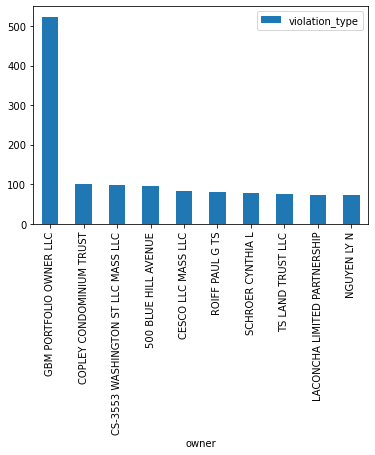

In [15]:
top_10_violators.plot(kind='bar')

In [16]:
len(rentsmart_2021[rentsmart_2021['owner']=='GBM PORTFOLIO OWNER LLC'])

523

In [17]:
len(rentsmart_2021[rentsmart_2021['owner']=='COPLEY CONDOMINIUM TRUST'])

101

In [18]:
gbm = rentsmart_2021[rentsmart_2021['owner']=='GBM PORTFOLIO OWNER LLC']
gbm.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
49,2021-11-28 00:00:00,Enforcement Violations,Overfilling of barrel/dumpster,"480-486 Norfolk St, 02126",Mattapan,02126,1800832000,GBM PORTFOLIO OWNER LLC,1965.0,1982.0,Residential 7 or more units,42.279680,-71.088470
61,2021-11-28 00:00:00,Enforcement Violations,Improper storage trash: res,"480-486 Norfolk St, 02126",Mattapan,02126,1800832000,GBM PORTFOLIO OWNER LLC,1965.0,1982.0,Residential 7 or more units,42.279680,-71.088470
285,2021-11-26 09:26:00,Housing Complaints,"Heat - Excessive, Insufficient","89 Tennis Rd #102, 02126",Mattapan,02126,1803085000,GBM PORTFOLIO OWNER LLC,1965.0,1980.0,Residential 7 or more units,42.277440,-71.097340
387,2021-11-24 11:39:00,Housing Complaints,Unsatisfactory Living Conditions,"1045 River St, 02136",Hyde Park,02136,1808175000,GBM PORTFOLIO OWNER LLC,1970.0,1980.0,Residential 7 or more units,42.259629,-71.117247
608,2021-11-23 00:00:00,Enforcement Violations,Improper storage trash: res,"430 River St, 02126",Mattapan,02126,1800014000,GBM PORTFOLIO OWNER LLC,1940.0,1975.0,Residential 7 or more units,42.269080,-71.091030


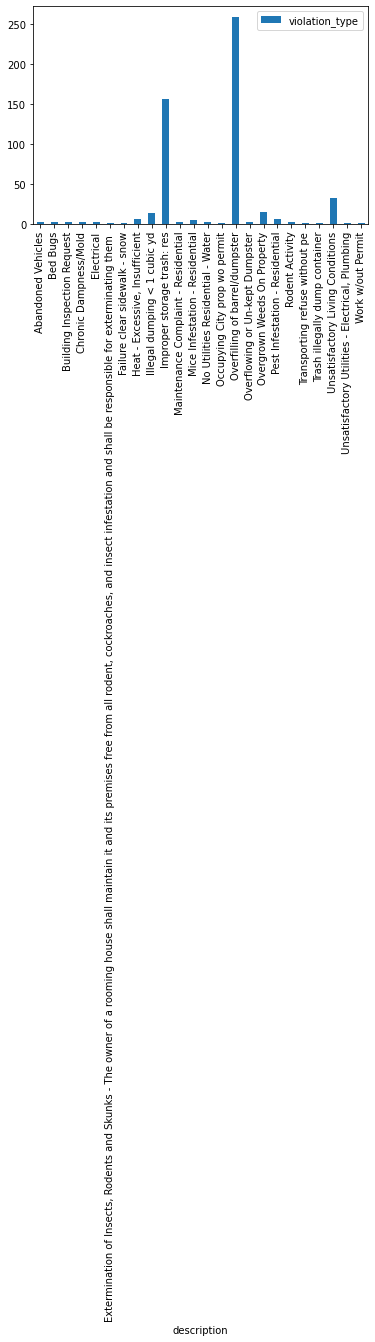

In [19]:
gbm[['description', 'violation_type']].groupby('description').count().plot(kind='bar')

In [ ]:
# use folium to plot violations for Boston
# https://python-visualization.github.io/folium/quickstart.html#Getting-Started

In [23]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [37]:
import folium

m = folium.Map(location=[42.35, -71.05], zoom_start=13)

folium.Marker(
    location=[42.35, -71.05],
    popup="Boston",
).add_to(m)

for i in range(10):
    folium.Marker(
        location=[rentsmart_2021.iloc[i]['latitude'], rentsmart_2021.iloc[i]['longitude']],
        popup=rentsmart_2021.iloc[i]['description'],
    ).add_to(m)

m

In [38]:
rentsmart_2021.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"117 Fulton St #5, 02109",Boston,02109,303580000,ONE-17 FULTON ST CONDO TR,1899.0,2002.0,Condominium Main*,42.362490,-71.052820
1,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"59 Myrtle St, 02114",Boston,02114,501923000,DECKER CATHERINE TRST,1899.0,2009.0,Residential 7 or more units,42.359396,-71.066566
2,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"70-72 Joy St, 02114",Boston,02114,300153000,PIZZUTI DONATO F,1899.0,2016.0,Residential 7 or more units,42.360630,-71.065330
3,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"49 Brimmer St, 02108",Boston,02108,502528000,DUMBAUGH CHARLES C TS,1899.0,2016.0,Residential 7 or more units,42.357020,-71.071950
4,2021-11-29 00:00:00,Enforcement Violations,Improper storage trash: res,"19 Tileston St, 02113",Boston,02113,302085000,NINETEEN TILESTON ST CONDO T,1999.0,1999.0,Condominium Main*,42.365540,-71.053720


In [41]:
mosquitoes = rentsmart_2021[rentsmart_2021['description'] == 'Mosquitoes (West Nile)']
mosquitoes

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
24729,2021-08-10 09:01:00,Sanitation Requests,Mosquitoes (West Nile),"32 Swan Ave, 02128",East Boston,02128,101530000,VU BAU,1998.0,NaN,Residential 2-family,42.389457,-70.996668
26984,2021-07-29 22:30:00,Sanitation Requests,Mosquitoes (West Nile),"61 Sherrin St, 02136",Hyde Park,02136,1808376010,JOHNS TERENCE A,2000.0,NaN,Residential 1-family,42.269580,-71.124880
27700,2021-07-26 18:25:00,Sanitation Requests,Mosquitoes (West Nile),"75 Prescott St, 02136",Hyde Park,02136,1809529000,GUPTILL SUE ANNE,1900.0,NaN,Residential 1-family,42.233290,-71.134460
28613,2021-07-21 09:18:00,Sanitation Requests,Mosquitoes (West Nile),"37 Eldon St, 02131",Roslindale,02131,2005121160,POOR CYNTHIA L,1992.0,NaN,Residential 1-family,42.293770,-71.132830
34382,2021-06-15 15:38:00,Sanitation Requests,Mosquitoes (West Nile),"1069 Dorchester Ave, 02125",Dorchester,02125,1302110000,SHUBERT SIDNEY,1900.0,2013.0,Residential 2-family,42.314180,-71.057170


In [42]:
len(mosquitoes)

5

In [46]:
m = folium.Map(location=[42.35, -71.05], zoom_start=11, tiles="Stamen Toner", )

folium.Marker(
    location=[42.35, -71.05],
    popup="Boston",
).add_to(m)

for i in range(len(mosquitoes)):
    folium.Marker(
        location=[mosquitoes.iloc[i]['latitude'], mosquitoes.iloc[i]['longitude']],
        popup=mosquitoes.iloc[i]['description'],
    ).add_to(m)

m